In [28]:
%matplotlib notebook
import pandas as pd
import matplotlib.pyplot as plt

In [29]:
with open("get-metric.csv", 'r') as temp_f:
    # get No of columns in each line
    col_count = [ len(l.split(",")) for l in temp_f.readlines() ]
print(col_count)
### Generate column names  (names will be 0, 1, 2, ..., maximum columns - 1)
column_names = [i for i in range(0, max(col_count))]

### Read csv
df = pd.read_csv("get-metric.csv", header=None, delimiter=",", names=column_names).T
df.columns = df.iloc[0]
df = df[1:]
df /=1000

[865, 1196, 1533, 1800, 1676, 1774, 1490, 1515]


In [37]:
tail1, tail2 = 0.50, 0.90
clients = [int(x[6:]) for x in df.columns]
upbound1,upbound2  = [], []
for col in df.columns:
    upbound1.append(df[col].quantile(tail1))
    upbound2.append(df[col].quantile(tail2))

<IPython.core.display.Javascript object>


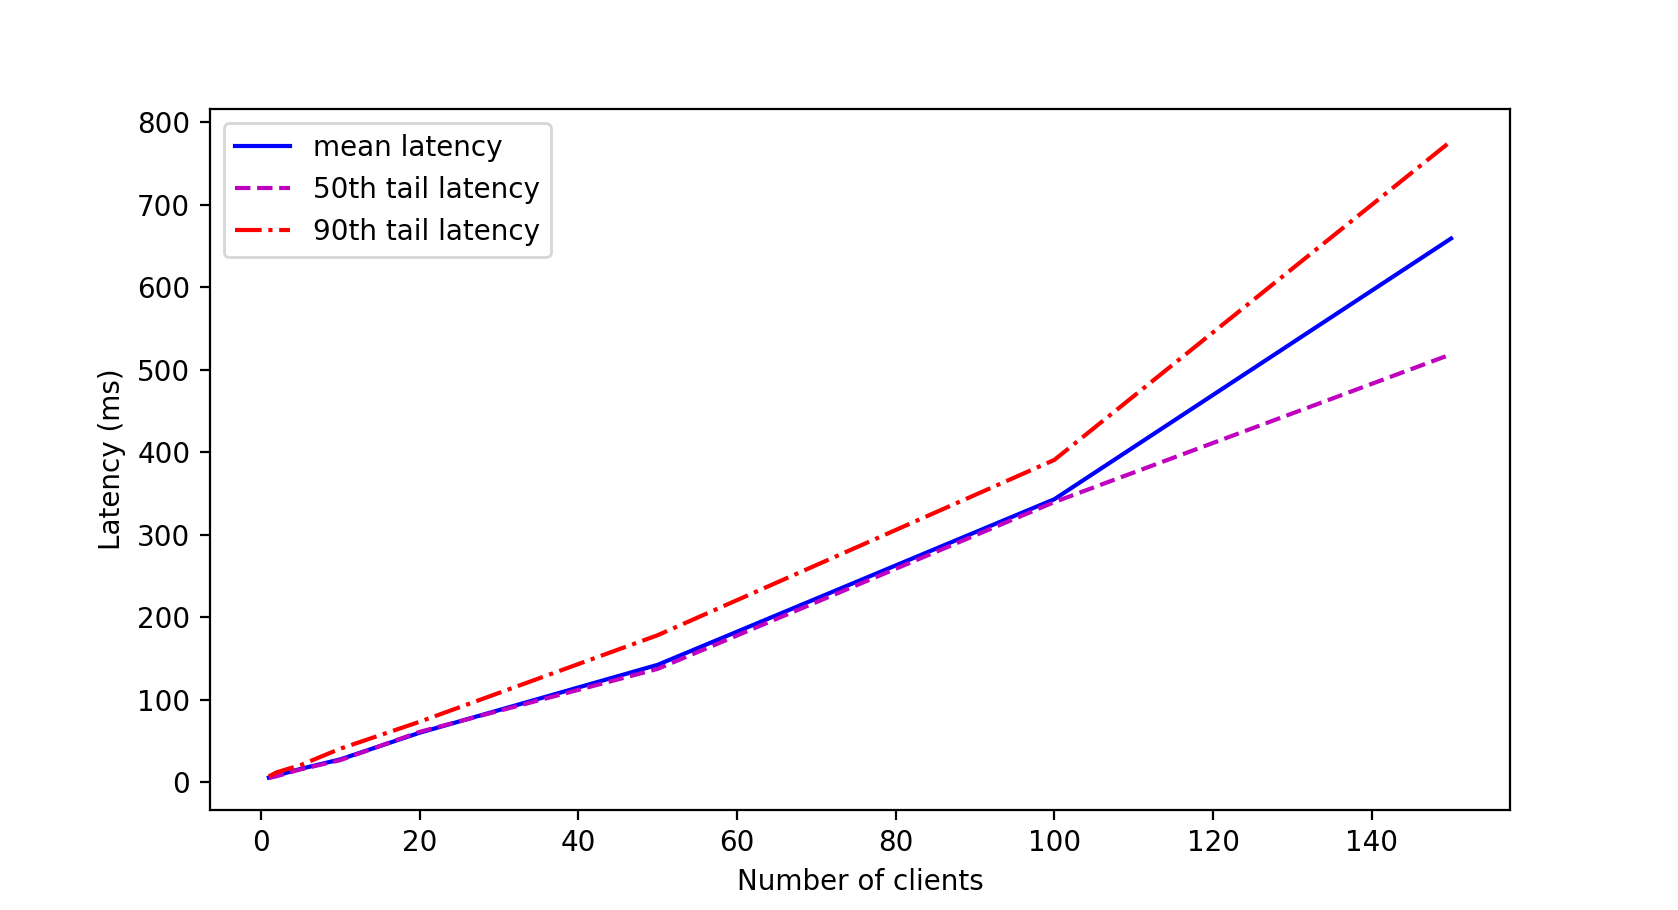

In [39]:
plt.plot(clients, df.mean().values, 'b', label='mean latency')
plt.plot(clients, upbound1, '--m', label='{:2.0f}th tail latency'.format(tail1*100))
plt.plot(clients, upbound2, '-.r', label='{:2.0f}th tail latency'.format(tail2*100))
plt.xlabel("Number of clients")
plt.ylabel("Latency (ms)")
plt.legend(loc="upper left")